In [1]:
import pandas as pd
import re
import os
import importlib
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')
import numpy as np
import importlib

import sys

project_root = '/Users/henrybaker/repositories/thesis_analysis'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Loading & Cleaning

In [ ]:
csv_path = f"results/controlled_results.csv"
df = run_load_clean_diagnose_data(csv_path)

✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    1139
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Round 1: Verfifying FLOPs on raw df
NB: FLOPs values are NOT constant: [5.26385823e+13 2.02486233e+13 0.00000000e+00]
Original distribution:
flops
0.000000e+00       1
2.024862e+13     103
5.263858e+13    1035
Name: count, dtype: int64

Dominant FLOPs value: 52638582308864.0
- Affected rows count: 104
- Affected row indices: [1, 2, 4, 5, 6, 8, 10, 15, 17, 19, 21, 22, 24, 26, 27, 29, 31, 32, 33, 34, 36, 38, 39, 41, 46, 48, 50, 56, 57, 64, 67, 69, 71, 74, 75, 77, 83, 86, 90, 91, 92, 93, 94, 96, 97, 99, 101, 104, 105, 106, 107, 110, 114, 115, 120, 121, 122, 123, 128, 129, 131, 132, 135, 139, 141, 145, 147, 150, 151, 159, 160, 165, 166, 168, 170, 171, 172, 175, 176, 181, 182, 183, 184, 186, 188, 189, 190, 191, 193, 194, 195, 197, 204, 207, 211, 212, 213, 21

/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:611: UserWarning: NB: FLOPs values are NOT constant: [5.26385823e+13 2.02486233e+13 0.00000000e+00]
  if not verify_flops(df):
/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:621: UserWarning: NB: FLOPs values are NOT constant: [1.69499710e+13 5.26385823e+13]
  verify_flops(df)


# Exploratory Data Analysis (EDA)

In [3]:
len(df[df['cycle_id'] == 5])

0

📊 Plotting histogram...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


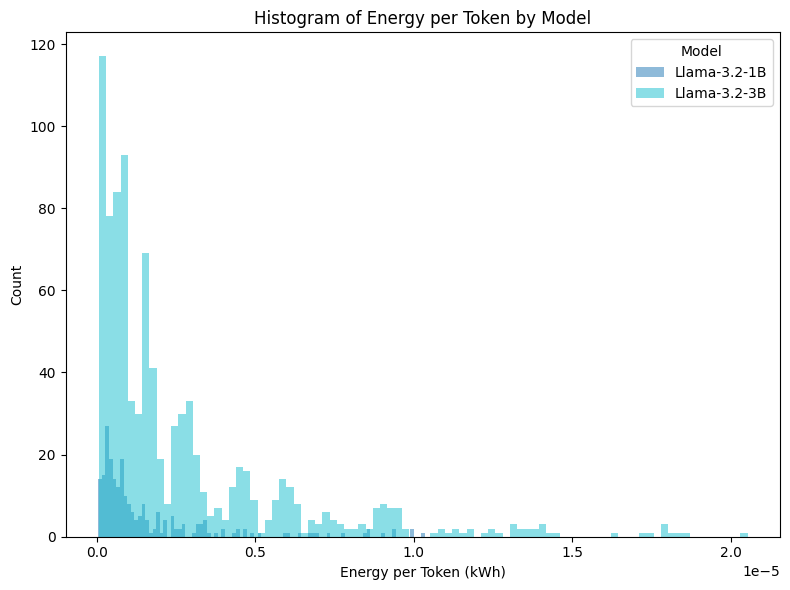

📦 Plotting boxplot...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))
/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data, vert=False, patch_artist=True, labels=models)
/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:51: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  box = ax.boxplot(data, vert=False, patch_artist=True, labels=models)


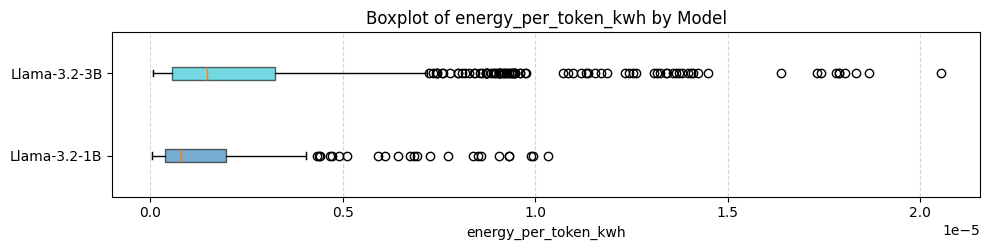

🔬 Scatter: by model...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


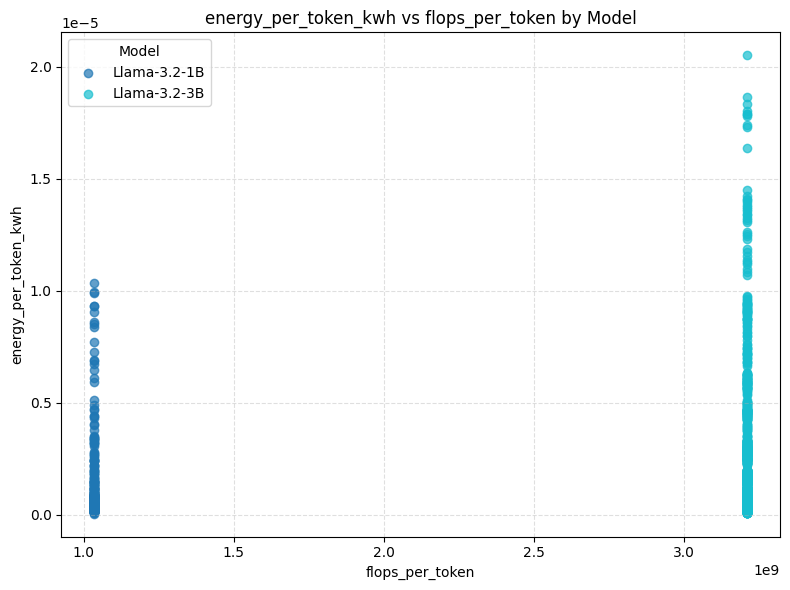

🔗 Correlation matrix...


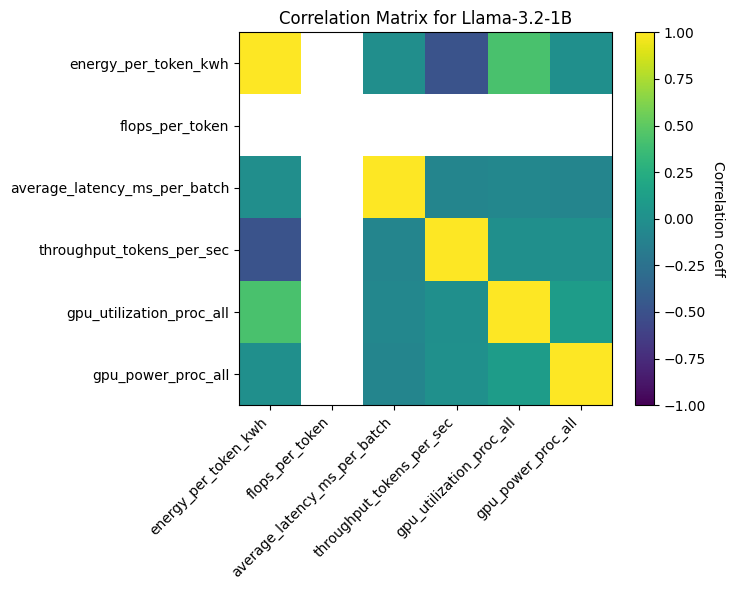

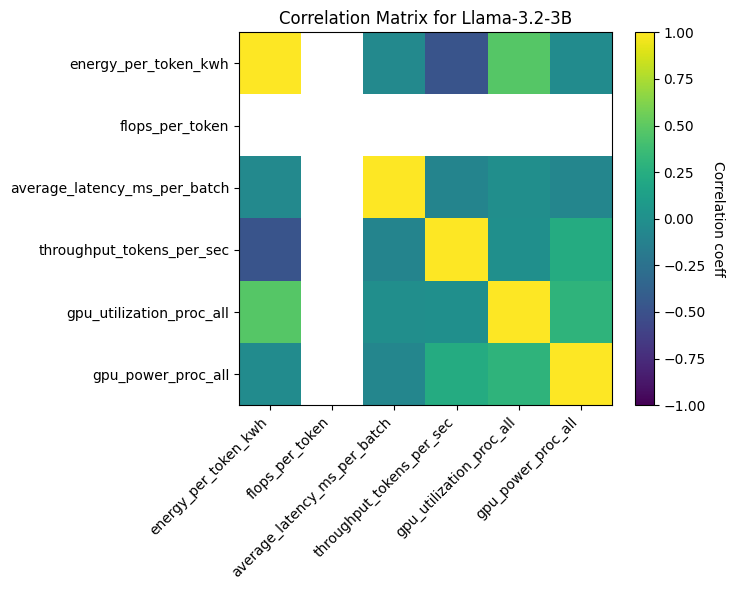

🔬 Scatter: Throughput vs energy...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


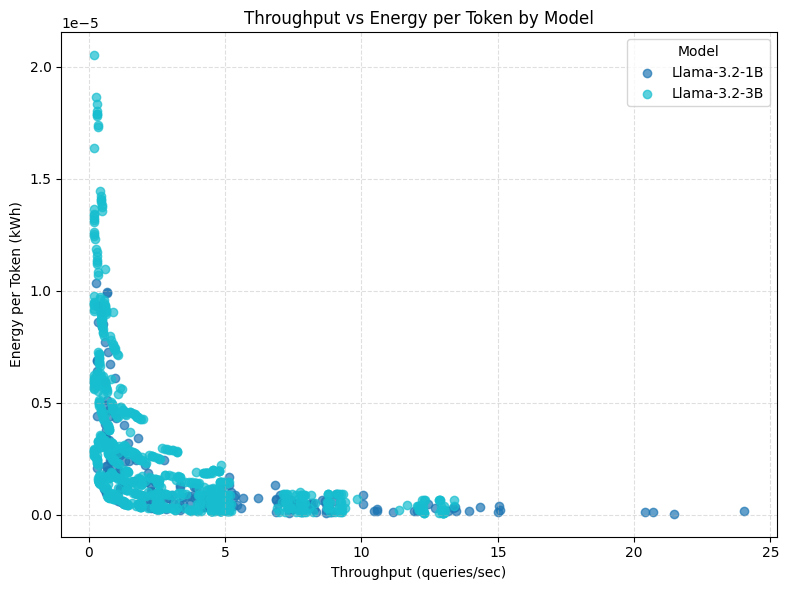

📈 Scatter: Divergence patterns...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


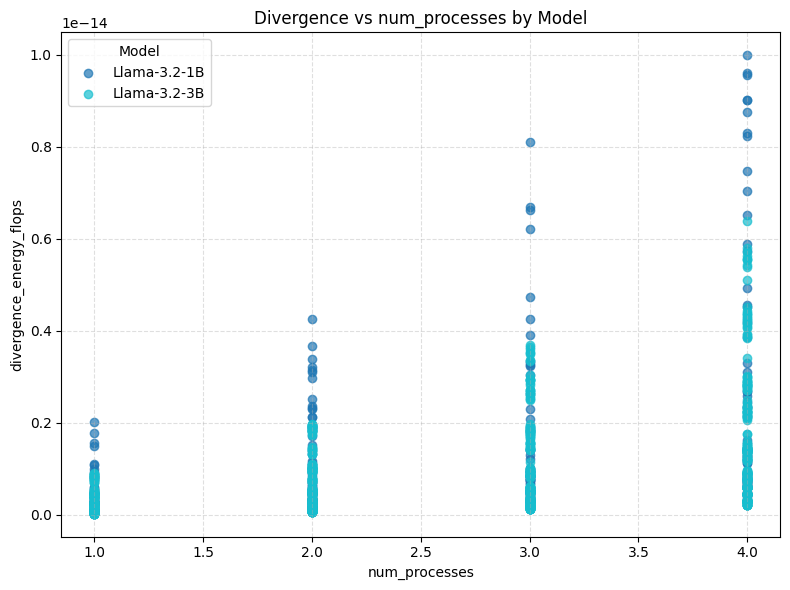

/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


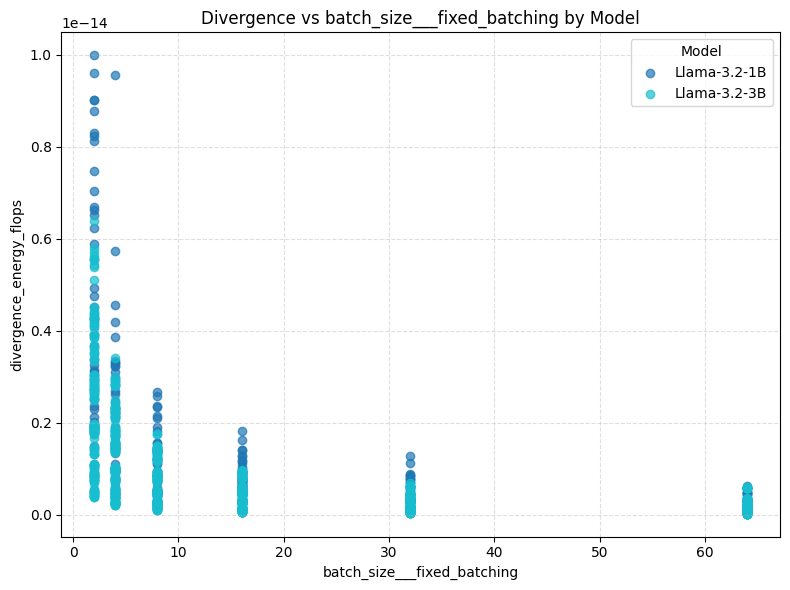

/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(models))


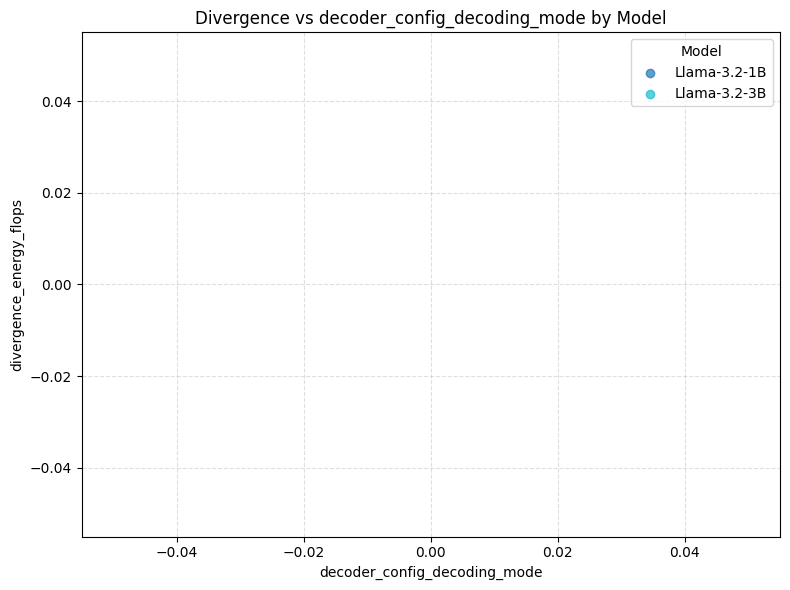

In [4]:
import scripts.b_exploratory_data_analysis as eda
importlib.reload(eda)

eda.plot_all_diagnostics(df)

TO DO:
- [ ] do a proper grid search on both models-> be able to properly compare e.g. num processes against everything  at all levels!
- [ ] throughput is clearly important! plot it in each of the controlled plots !!!
- [ ] also print average_latency_ms_per_batch

outcome vars to plot across controlled vars
- [ ] energy_per_token_kwh_mean
- [ ] average_latency_ms_per_batch
- [ ] throughput_tokens_per_sec_mean

Then do as a full grid search -> don't filter the db, but print at all levels

# CONTROLLED EXPERIMENT PLOTS

These are different to the subsequent grid search plots, as we are ONLY varying one variable against a (somewhat arbitrary) baseline.

- currently it works on subsetted dfs, but once done grid search: get it to work on full df -> capture variance at diff points

- [ ] change normalised axes to say 'normalised to baseline' (some say normalised, some don't say anything)

- [x] Normalise axes as z-scores
- [x] if decoder temp remains a mess, print stratified by cycle
- [x] on latency axis, print out the interval range!
- [x] top p and k value normalised plots: the y axis does not have 'normalised'
- [x] add the baseline annotation BELOW the red dotted line
- [x] do as full grid search
- [x] FLOPs to be visually diff
- [x] decoder temp yaxis not normalising
- [x] remove the FLOPs line from the Deocder & Latency plots


In [ ]:
configs = ['num_processes', 'batching','precis', 'decoding', 'latency']
dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}

## Number of Process plots

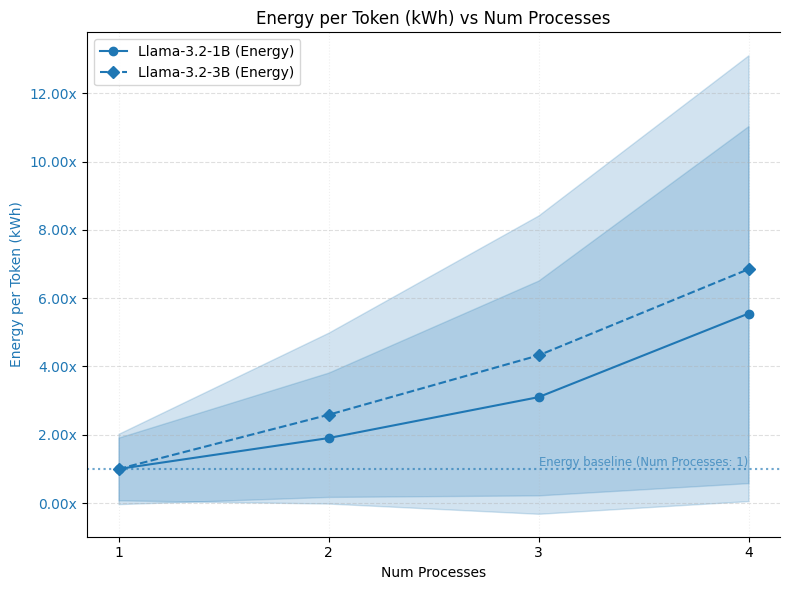

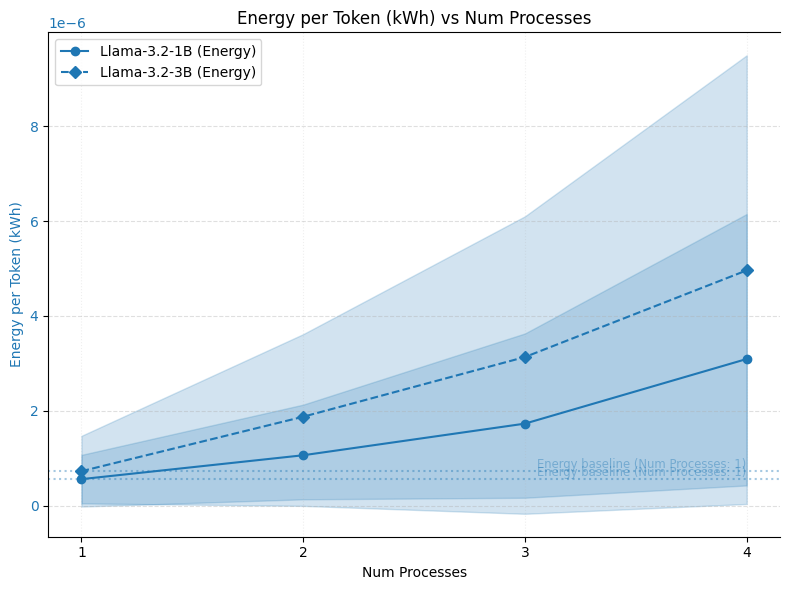

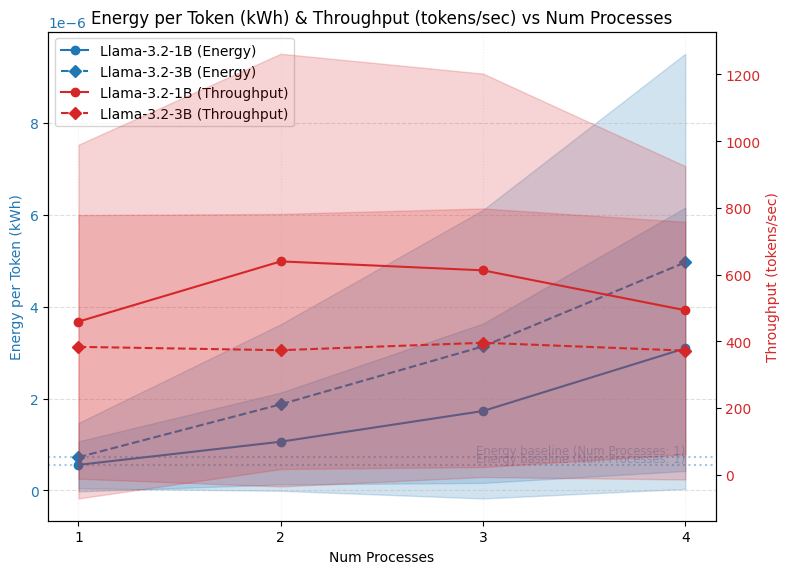

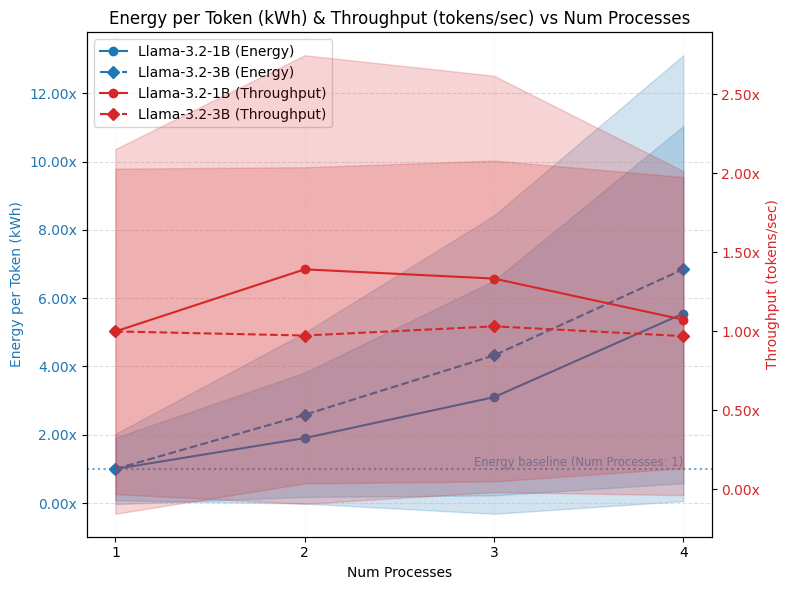

In [6]:
import scripts.c_vis_proc_precis_batch as viz
importlib.reload(viz)

from scripts.c_vis_proc_precis_batch import (
    plot_num_processes,
    plot_batching,
    plot_precision,
    #plot_decoder_temperature,
    #plot_decoder_topk,
    #plot_decoder_topp,
    #plot_latency_by_burst_size,
    #plot_latency_by_burst_interval,
)

# 1) Number of processes

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_num_processes(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)



## Batching plots

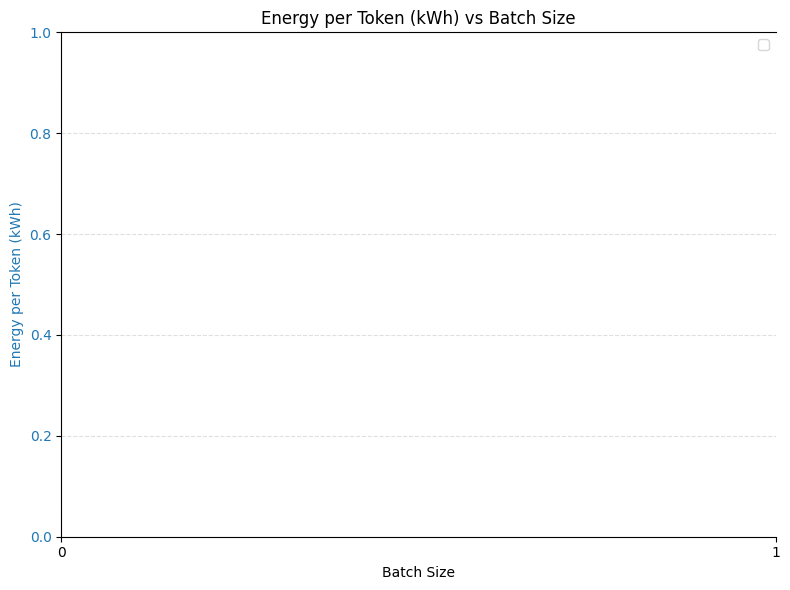

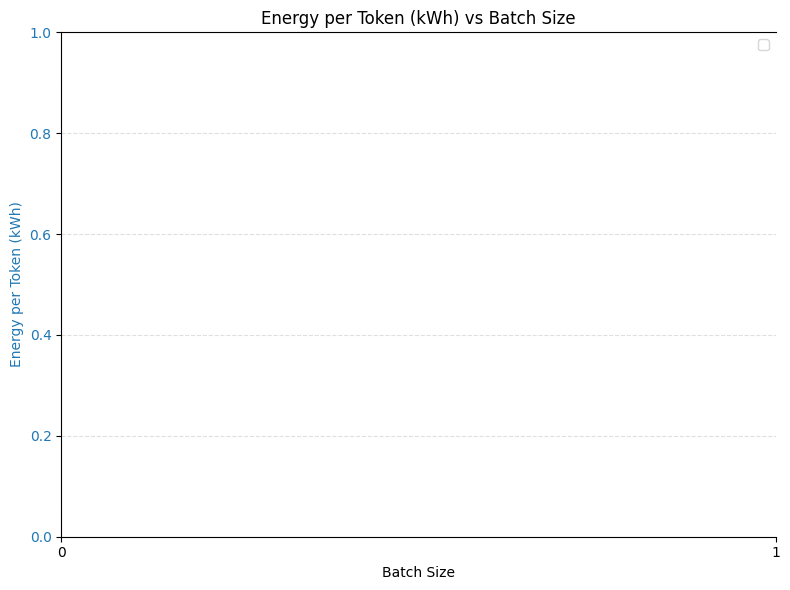

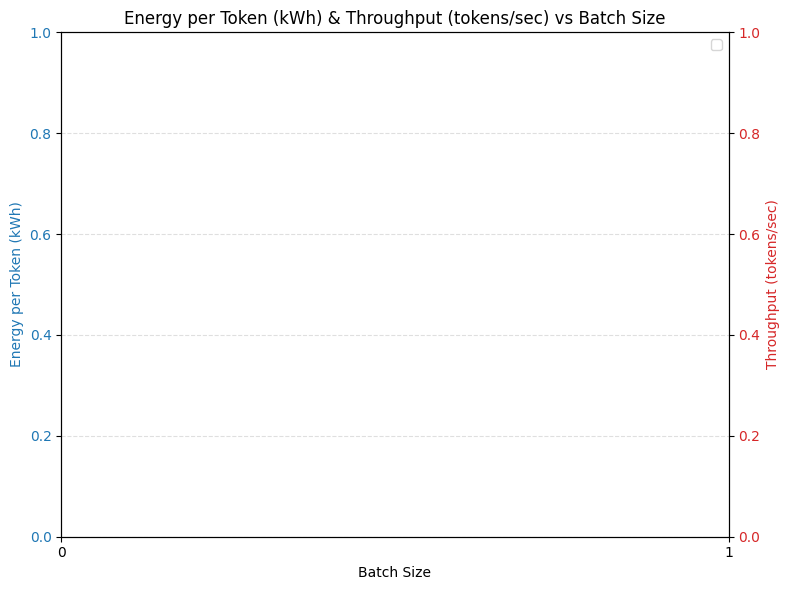

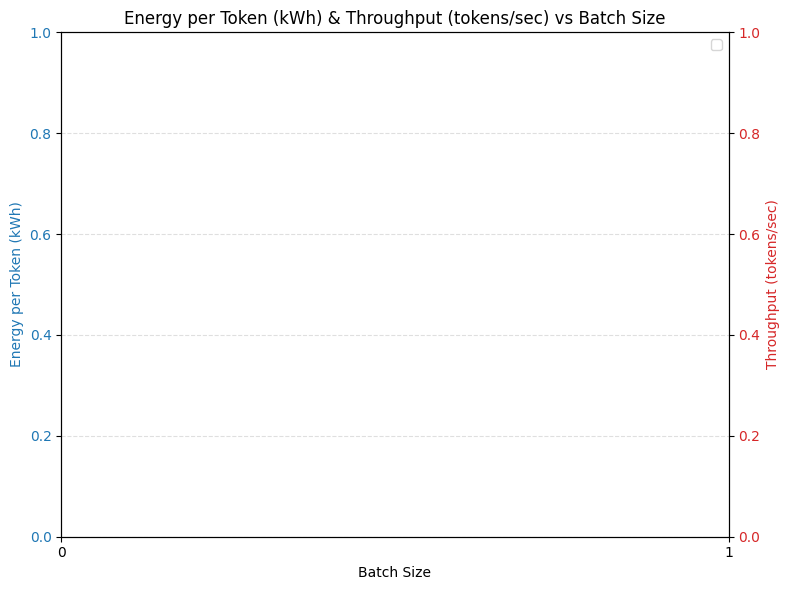

In [7]:
# 2) Batch size
plot_batching(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
    )

plot_batching(
    dfs,
    ax1='energy_per_token',
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
    )

plot_batching(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_batching(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)



## Precision plots

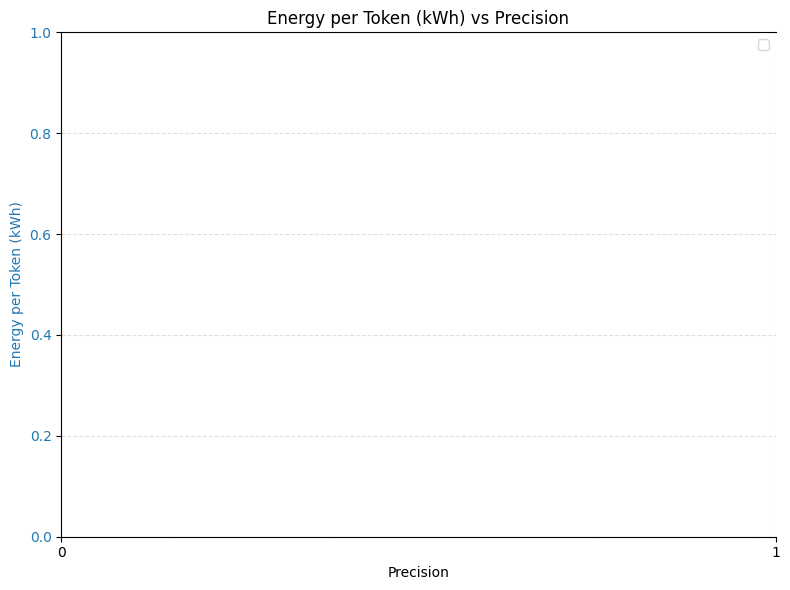

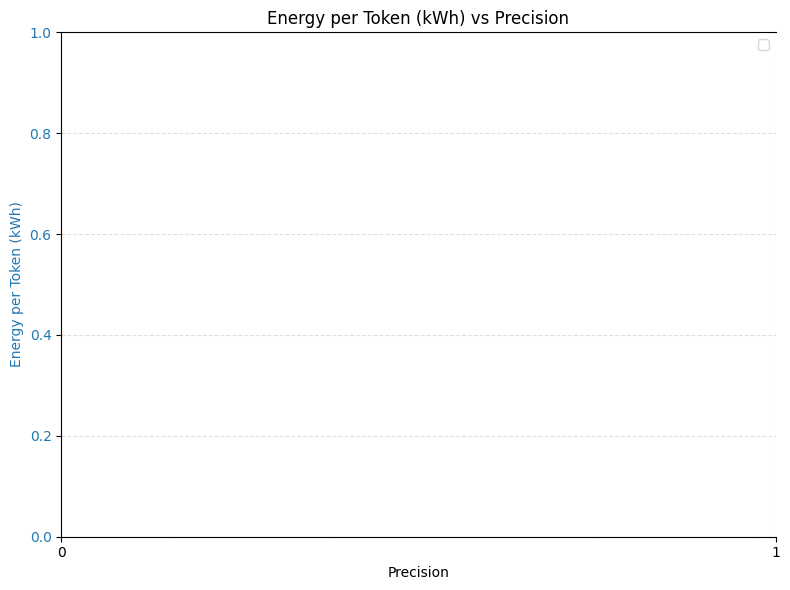

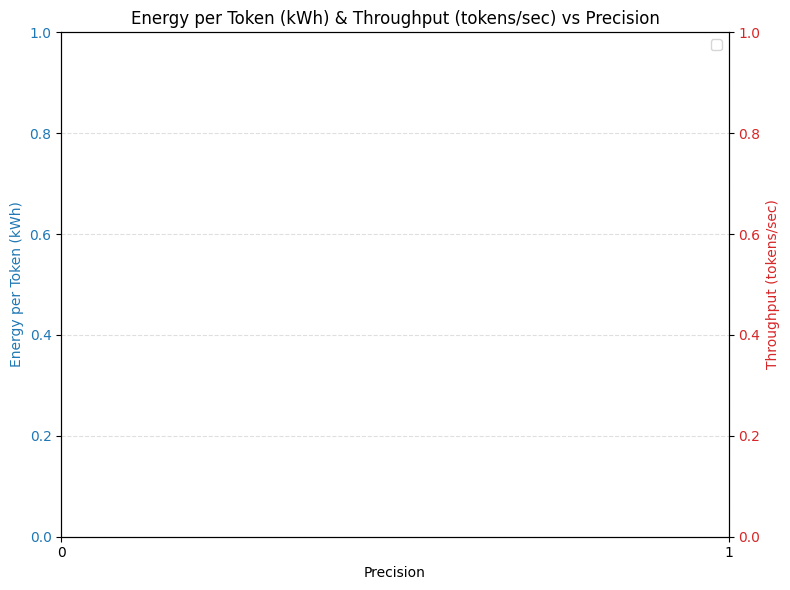

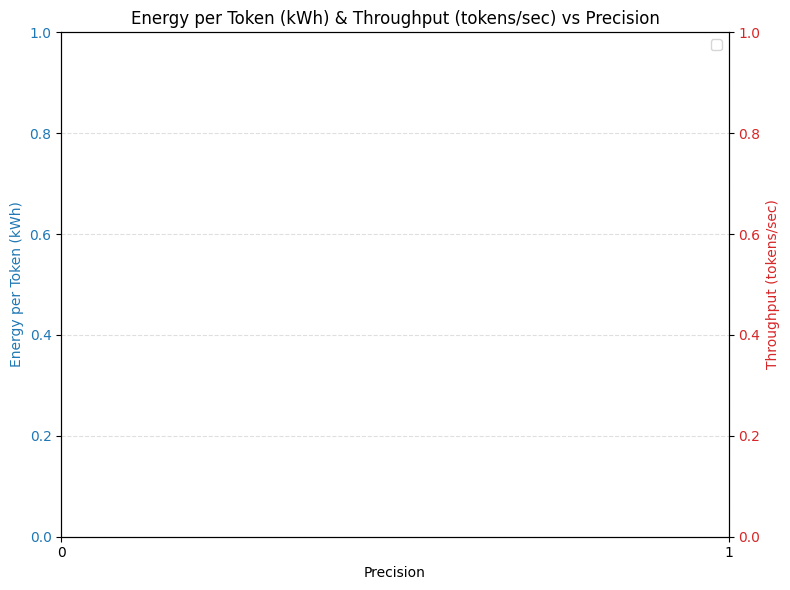

In [8]:
# 3) Precision modes (FP32/FP16/INT8/INT4)
plot_precision(
    dfs,
    ax1='energy_per_token',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)
plot_precision(
    dfs,
    ax1='energy_per_token',
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_precision(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

plot_precision(
    dfs,
    ax1='energy_per_token',
    ax2='throughput_tokens_per_sec',
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    add_baseline_throughput=False
)

## Decoder Plots

### (i) Across Decoder Temperature, grouped  by mode

/Users/henrybaker/repositories/thesis_analysis/scripts/d_vis_decoder.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


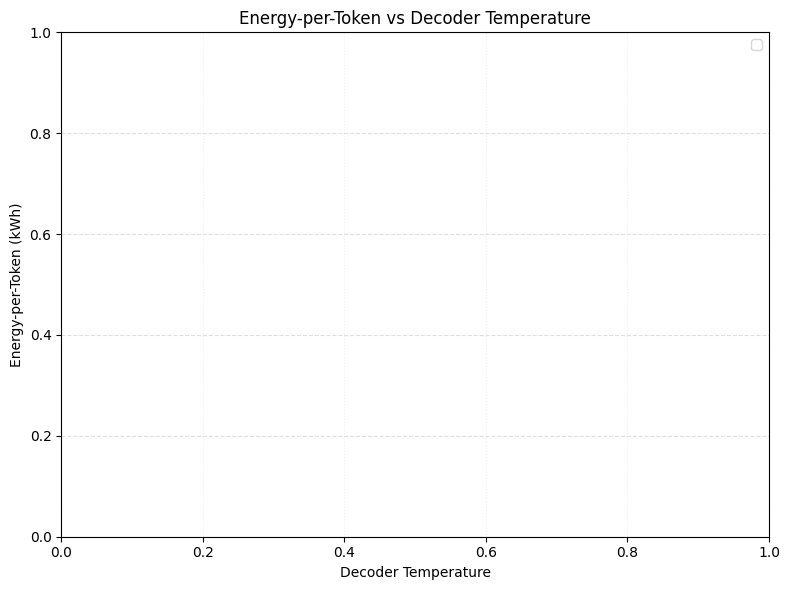

/Users/henrybaker/repositories/thesis_analysis/scripts/d_vis_decoder.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


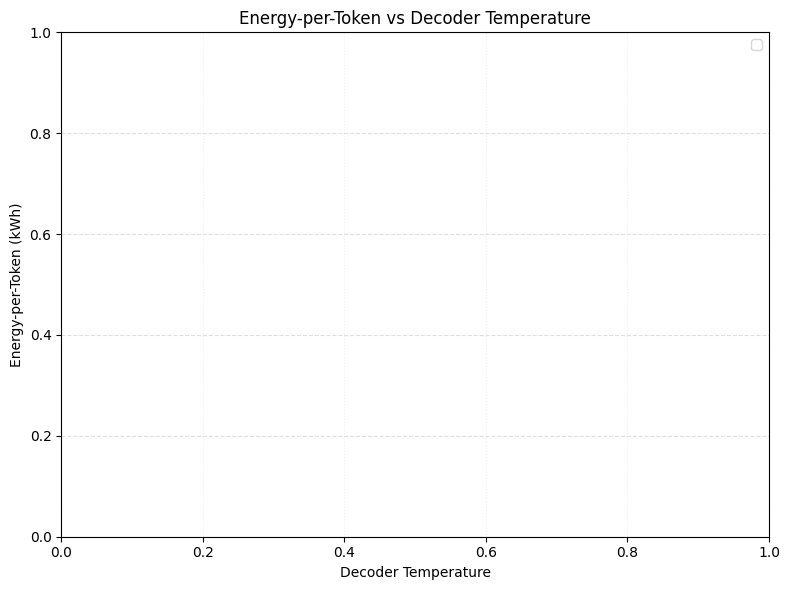

/Users/henrybaker/repositories/thesis_analysis/scripts/d_vis_decoder.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


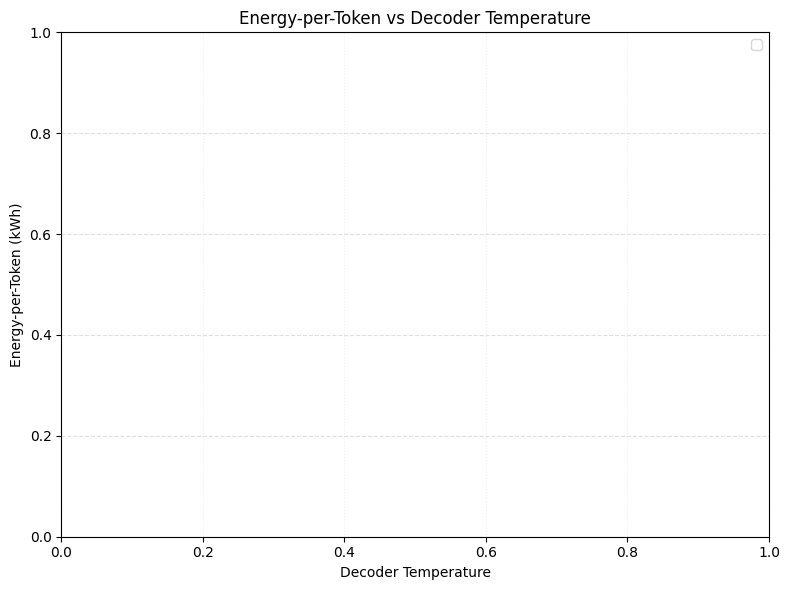

In [9]:
import scripts.d_vis_decoder as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder import plot_decoder_temperature

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )


/Users/henrybaker/repositories/thesis_analysis/scripts/d_vis_decoder.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


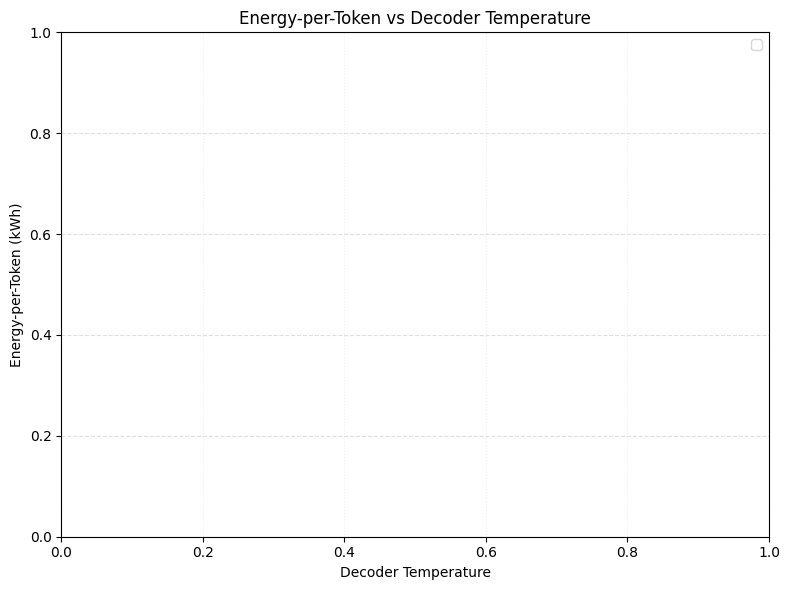

/Users/henrybaker/repositories/thesis_analysis/scripts/d_vis_decoder.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


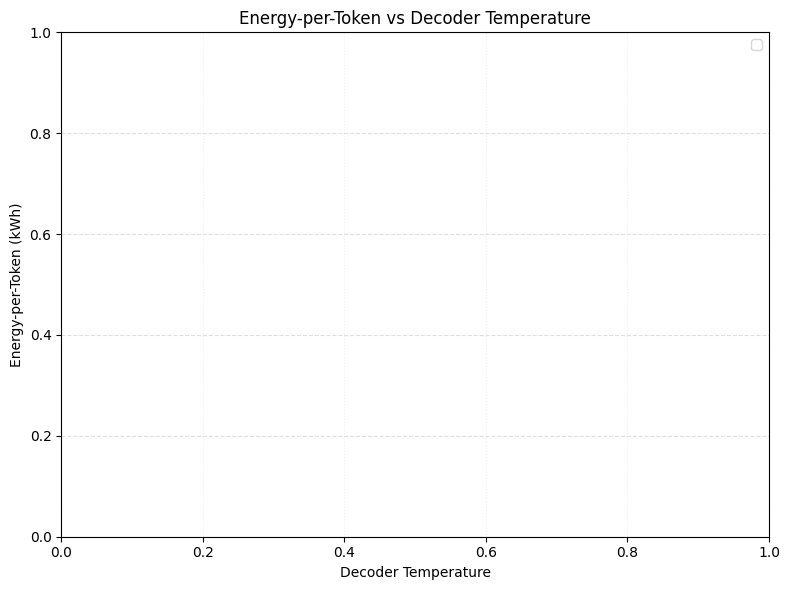

/Users/henrybaker/repositories/thesis_analysis/scripts/d_vis_decoder.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


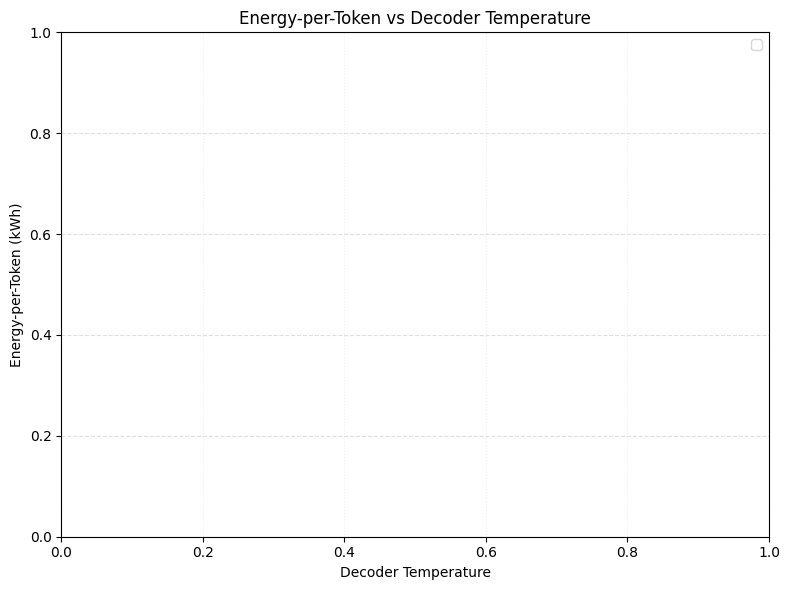

In [10]:
plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

Plotting the meaned stat with 1std is messy: choosing individual runs.

/Users/henrybaker/repositories/thesis_analysis/scripts/d_vis_decoder.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


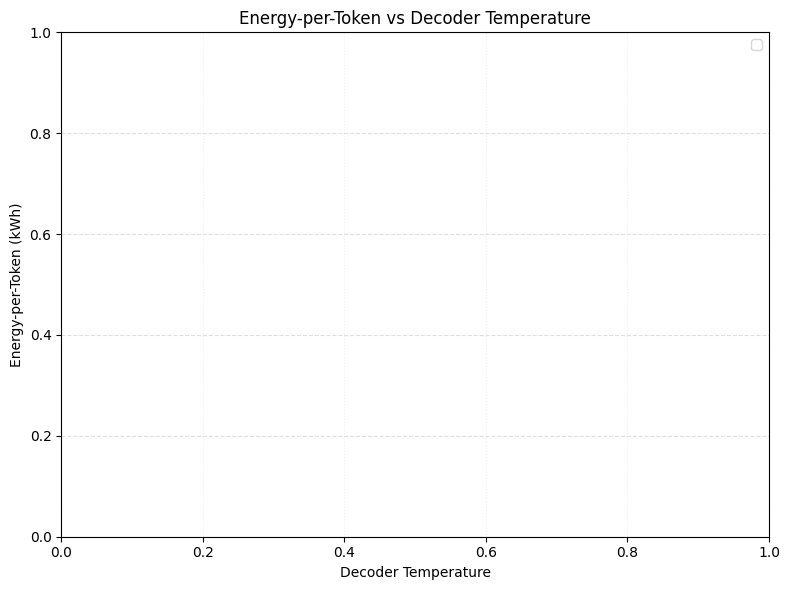

/Users/henrybaker/repositories/thesis_analysis/scripts/d_vis_decoder.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


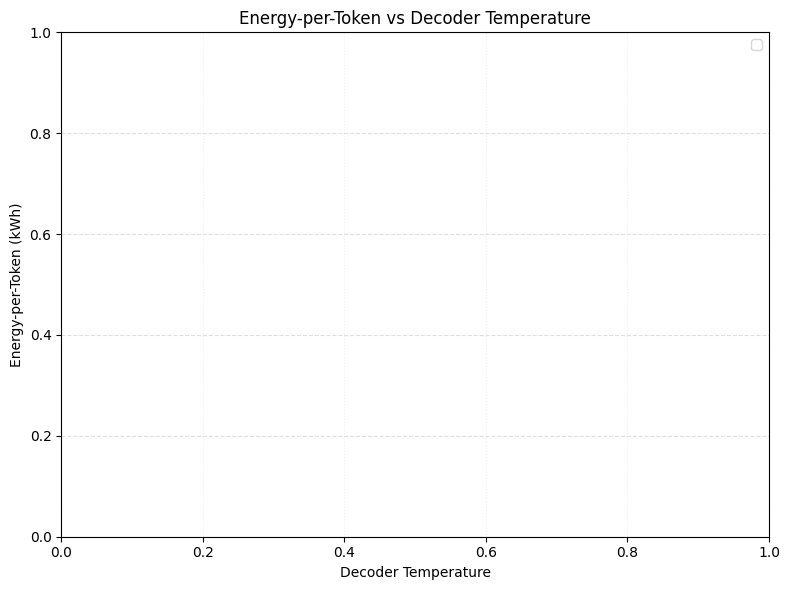

/Users/henrybaker/repositories/thesis_analysis/scripts/d_vis_decoder.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best')


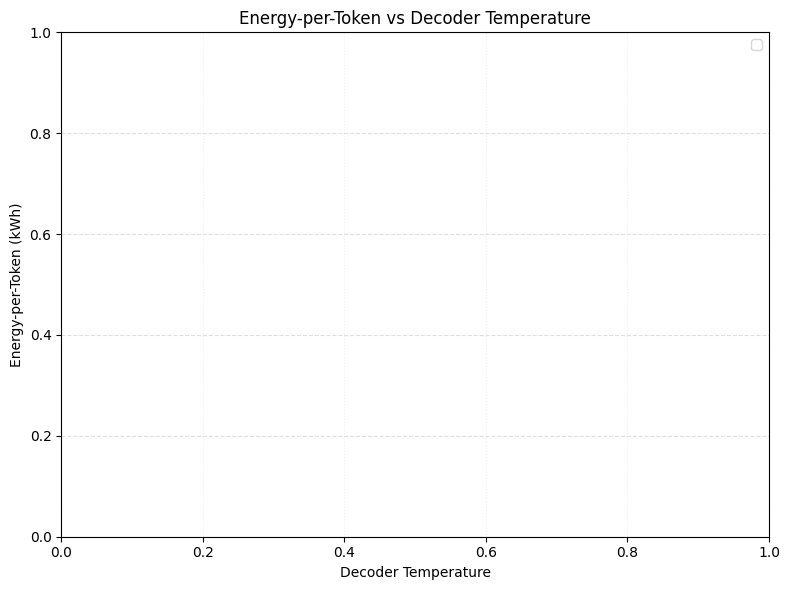

In [11]:
plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1', 'ax2'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

plot_decoder_temperature(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=True,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

- All of them vs the greedy baseline are higher.
- top p consistenly the highest
- 

to do:
- change the blue label (it's not greedy, it's stochastic???)

### (ii) Across Top-k values, grouped by temperature

In [12]:
import scripts.d_vis_decoder as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder import plot_decoder_temperature, plot_decoder_top_k

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )


No top_k data to plot.
No top_k data to plot.
No top_k data to plot.


In [13]:
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

No top_k data to plot.
No top_k data to plot.
No top_k data to plot.


It's pretty much just noise. Trying below with a few selected runs.

1) 1B model

In [14]:
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=3
    )

No top_k data to plot.
No top_k data to plot.
No top_k data to plot.


2. 3B model

In [15]:
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )
plot_decoder_top_k(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

No top_k data to plot.
No top_k data to plot.


Just noise - no real trends 

### (iii) Across Top-p values, grouped by temperature

In [16]:
import scripts.d_vis_decoder as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder import plot_decoder_temperature, plot_decoder_top_k, plot_decoder_top_p

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )


No top_p data to plot.
No top_p data to plot.
No top_p data to plot.


In [17]:
plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=3
    )

No top_p data to plot.
No top_p data to plot.
No top_p data to plot.
No top_p data to plot.


Can see that higher temp consistnely have higher energy consumption, but no trend in increasing top p value

In [18]:
import scripts.d_vis_decoder as viz_decoder
importlib.reload(viz_decoder)

from scripts.d_vis_decoder import plot_decoder_temperature, plot_decoder_top_k, plot_decoder_top_p

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

plot_decoder_top_p(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

No top_p data to plot.
No top_p data to plot.
No top_p data to plot.


## Latency Plots

### (i) by burst size

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues', len(sizes)+1)
/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', title='Model:Class')


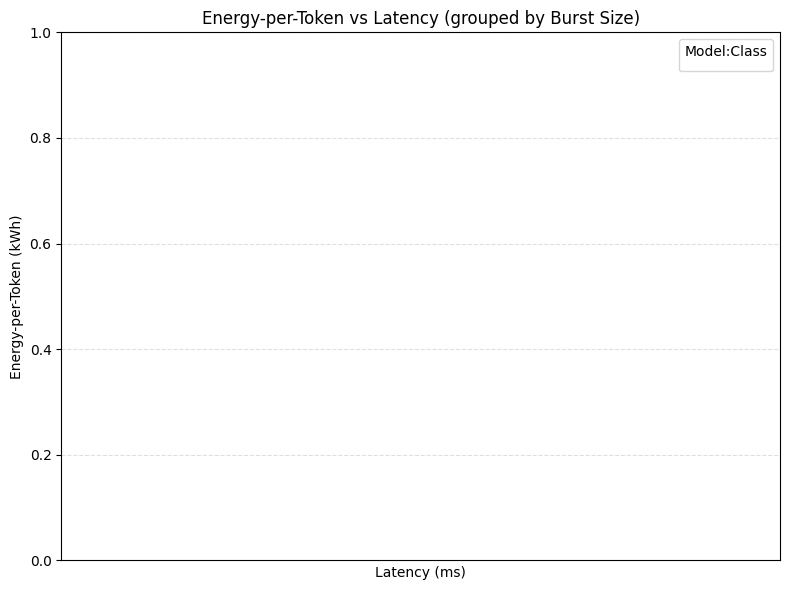

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues', len(sizes)+1)
/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', title='Model:Class')


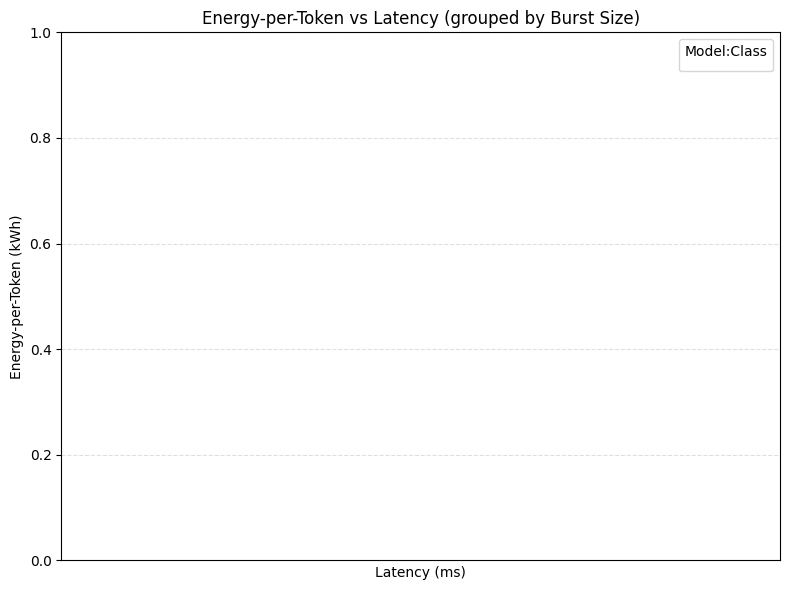

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues', len(sizes)+1)
/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', title='Model:Class')


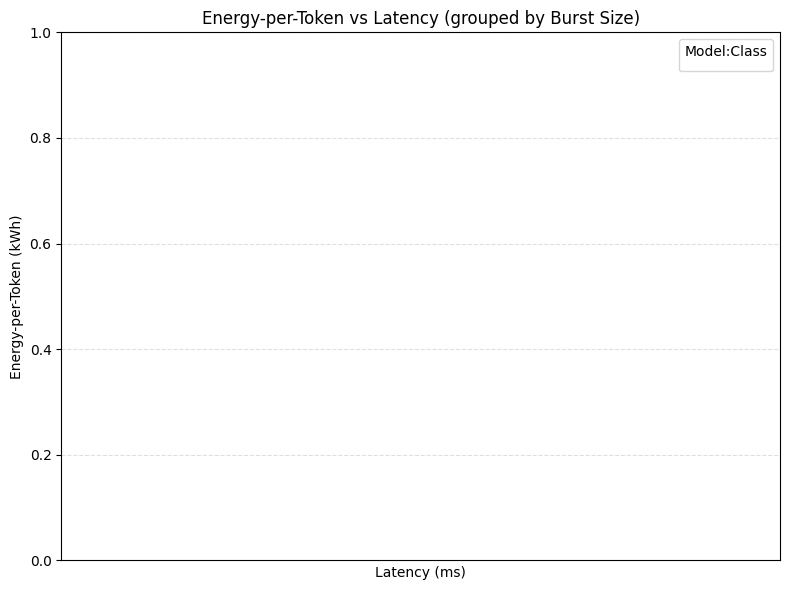

In [19]:
import scripts.e_vis_latency as vis_latency
importlib.reload(vis_latency)

from scripts.e_vis_latency import plot_latency_burst_size

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
)

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=[],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=None
    )

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues', len(sizes)+1)
/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', title='Model:Class')


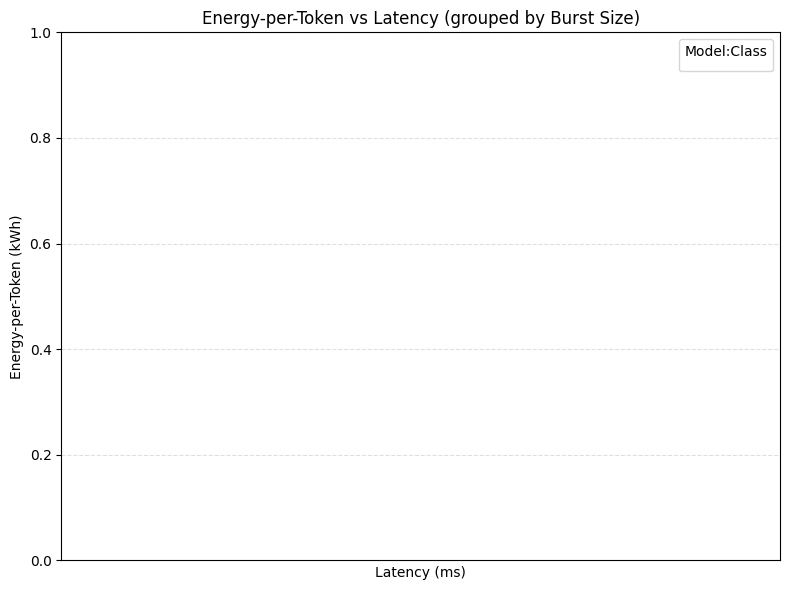

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues', len(sizes)+1)
/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', title='Model:Class')


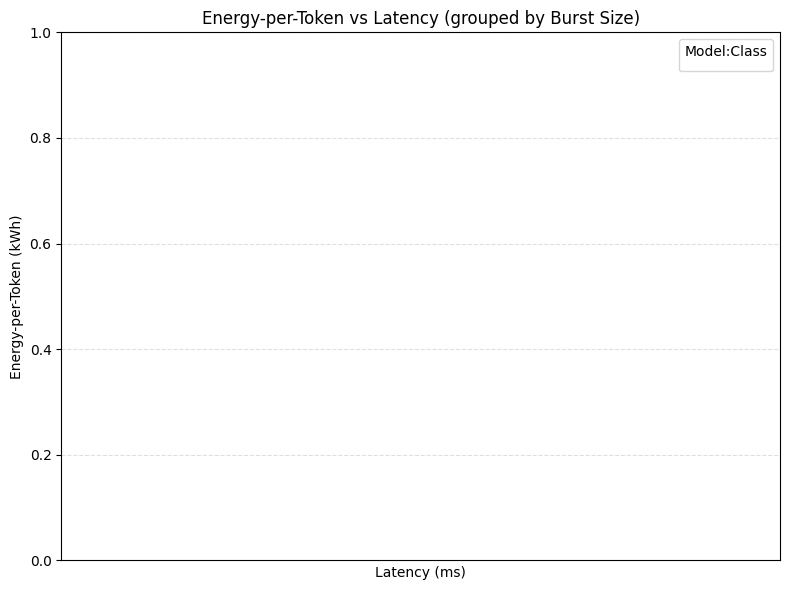

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues', len(sizes)+1)
/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', title='Model:Class')


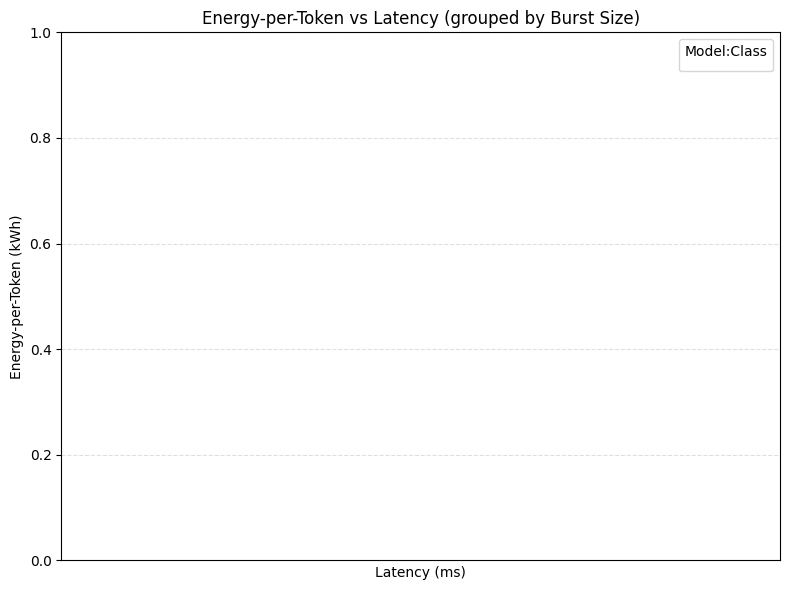

In [20]:
import scripts.e_vis_latency as vis_latency
importlib.reload(vis_latency)

from scripts.e_vis_latency import plot_latency_burst_size

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
)

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=2
    )

plot_latency_burst_size(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

### (ii) by burst interal

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:244: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens', len(intervals)+1)
/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:305: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', title='Model:Class')


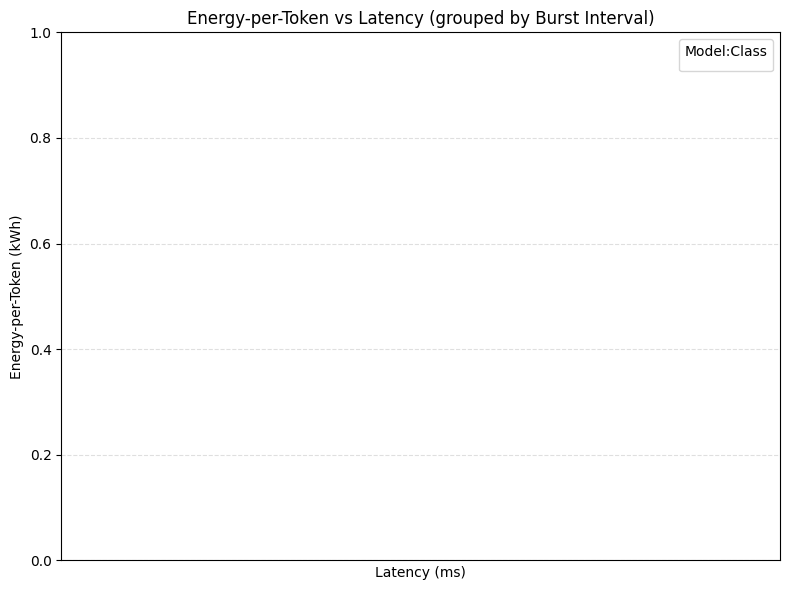

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:244: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens', len(intervals)+1)
/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:305: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', title='Model:Class')


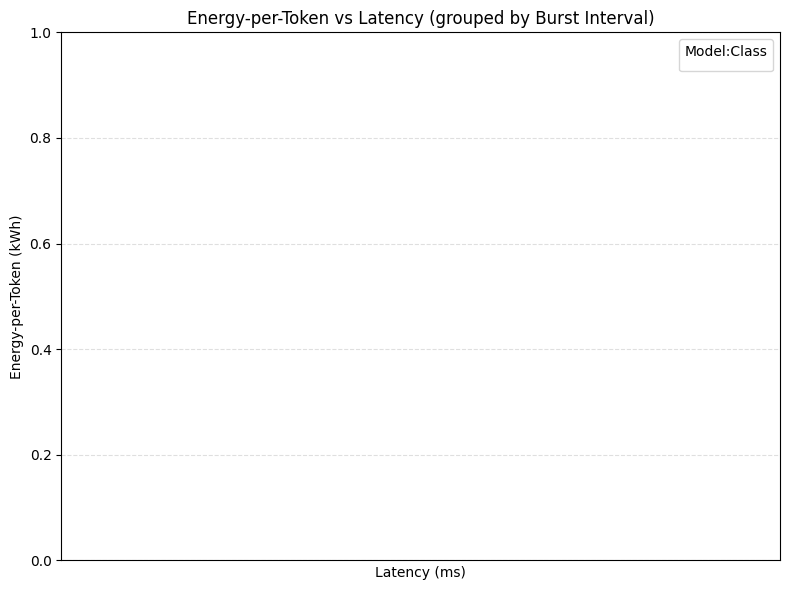

/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:244: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens', len(intervals)+1)
/Users/henrybaker/repositories/thesis_analysis/scripts/e_vis_latency.py:305: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', title='Model:Class')


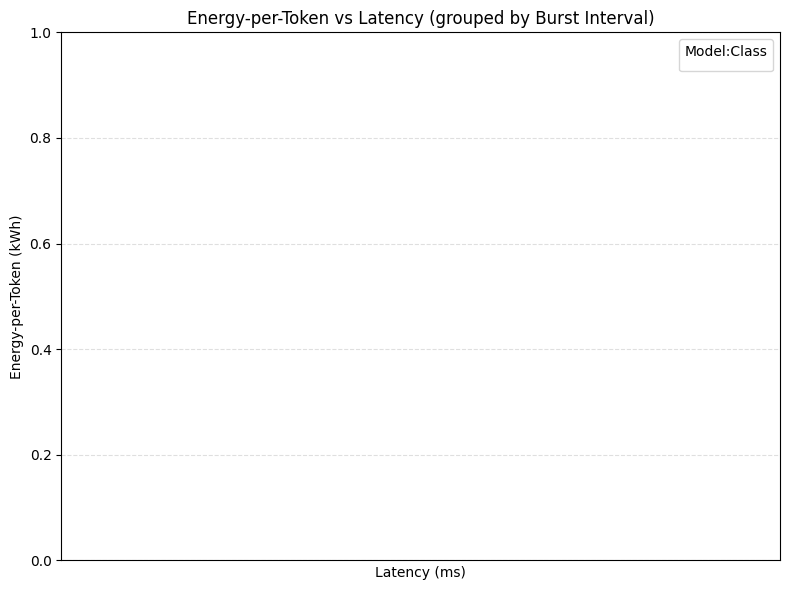

In [21]:
import scripts.e_vis_latency as vis_latency
importlib.reload(vis_latency)

from scripts.e_vis_latency import plot_latency_burst_interval

plot_latency_burst_interval(
    dfs=dfs,
    model=['Llama-3.2-1B', 'Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
)

plot_latency_burst_interval(
    dfs=dfs,
    model=['Llama-3.2-1B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

plot_latency_burst_interval(
    dfs=dfs,
    model=['Llama-3.2-3B'],
    normalise_axes=['ax1'],
    plot_mean=True,
    plot_band=False,
    plot_raw=False,
    add_baseline_energy=True,
    cycle_id=1
    )

# plot: batch size on x axis, group by number of processes

# Grid search plots

This is different to the controlled experiments, where we kept everything constant and plotted against a (somewhat arbitrary) baseline. This should demonstrate the areas of parameter space (i.e. of a selected variable along the x axis) where there is variation (driven by variation in the other variables)